In [25]:
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import pingouin as pg
from matplotlib import pyplot as plt

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [30]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

In [2]:
path_to_file = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-tolstihin/5_task_1.csv'

In [4]:
df1 = pd.read_csv(path_to_file , sep = ',')
df1

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


In [5]:
path_to_file = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-tolstihin/5_task_2.csv'
df2 = pd.read_csv(path_to_file , sep = ',')
df2

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


In [18]:
scipy.stats.levene(df1.query("group == 'A'").events,df1.query("group == 'B'").events,df1.query("group == 'C'").events)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [16]:
df1.query("group == 'A'")

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
9995,5603,A,25
9996,18188,A,25
9997,16354,A,30
9998,27737,A,21


In [19]:
stats.shapiro(df1.query("group == 'A'").events)

/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9989418387413025, pvalue=4.318870651331963e-06)

In [20]:
stats.shapiro(df1.query("group == 'B'").events)

ShapiroResult(statistic=0.9990161061286926, pvalue=1.0504894817131571e-05)

In [21]:
stats.shapiro(df1.query("group == 'C'").events)

ShapiroResult(statistic=0.9989210963249207, pvalue=3.3885160064528463e-06)

In [22]:
scipy.stats.normaltest(df1.query("group == 'A'").events)

NormaltestResult(statistic=2.1034599402238734, pvalue=0.3493328906085719)

In [23]:
scipy.stats.normaltest(df1.query("group == 'B'").events)

NormaltestResult(statistic=0.8410715800223014, pvalue=0.6566948749848232)

In [24]:
scipy.stats.normaltest(df1.query("group == 'C'").events)

NormaltestResult(statistic=3.243725809054571, pvalue=0.19753037588314626)

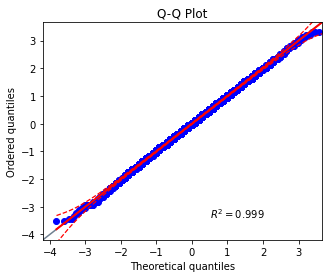

In [26]:
pg.qqplot(df1.query("group == 'A'").events, dist='norm')

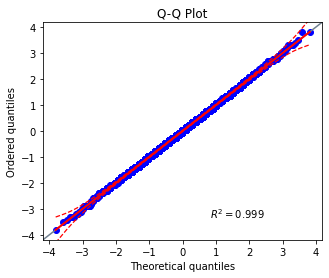

In [27]:
pg.qqplot(df1.query("group == 'B'").events, dist='norm')

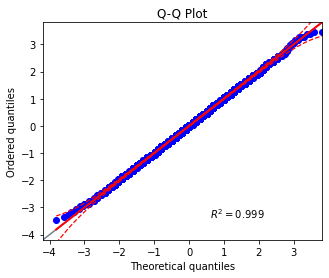

In [28]:
pg.qqplot(df1.query("group == 'C'").events, dist='norm')

In [29]:
scipy.stats.f_oneway(df1.query("group == 'A'").events,df1.query("group == 'B'").events,df1.query("group == 'C'").events)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [38]:
print(pairwise_tukeyhsd(df1.events, df1.group))


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


In [39]:
df2

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


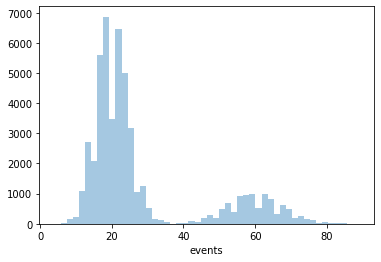

In [42]:
sns.distplot(df2.query("group == 'control'").events, kde = False)

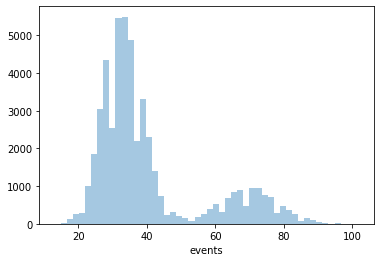

In [43]:
sns.distplot(df2.query("group == 'test'").events, kde = False)

In [47]:
df2.groupby(['group', 'segment']) \
    .agg({'events':'std'}).round(2)

events
group   segment        
control high       7.81
        low        4.47
test    high       8.40
        low        5.72

In [48]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [50]:
formula = 'events ~ group + segment + group:segment'
model = ols(formula, df2).fit()
aov_table = anova_lm(model, typ=2)

In [51]:
aov_table

,sum_sq,df,F,PR(>F)
group,3.837195e+06,1.0,112031.864119,0.000000e+00
segment,2.362480e+07,1.0,689756.377484,0.000000e+00
group:segment,3.664244e+04,1.0,1069.823273,2.060261e-233
Residual,3.424956e+06,99996.0,NaN,NaN


In [54]:
df2['seg_gr'] = df2.group + '_' + df2.segment
df2

,id,group,segment,events,seg_gr
0,83440,test,high,78.0,test_high
1,96723,test,high,71.0,test_high
2,68719,test,high,80.0,test_high
3,50399,test,high,80.0,test_high
4,95613,test,high,78.0,test_high
...,...,...,...,...,...
99995,60695,control,low,15.0,control_low
99996,5934,control,low,16.0,control_low
99997,30046,control,low,22.0,control_low
99998,26474,control,low,21.0,control_low


In [55]:
print(pairwise_tukeyhsd(df2.events, df2.seg_gr))

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2   meandiff p-adj  lower    upper   reject
----------------------------------------------------------------
control_high control_low -39.9392 0.001 -40.1073 -39.7711   True
control_high   test_high   9.9677 0.001   9.7551  10.1803   True
control_high    test_low -26.9449 0.001  -27.113 -26.7768   True
 control_low   test_high  49.9069 0.001  49.7388   50.075   True
 control_low    test_low  12.9944 0.001   12.888  13.1007   True
   test_high    test_low -36.9126 0.001 -37.0807 -36.7445   True
----------------------------------------------------------------
